In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font', family='Comic Sans MS')

0.063480183326538722

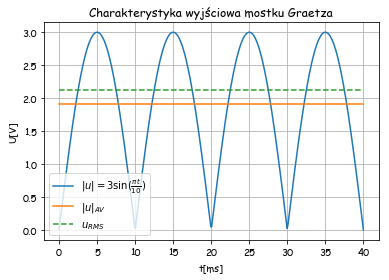

In [28]:
t = np.linspace(0,40,400)
u = 3*np.abs(np.sin(np.pi*t/10))
uAV = np.zeros(400) + u.mean()
uRMS = np.pi/2/np.sqrt(2)*uAV
uPomiar = np.zeros(400) + 1.68*np.pi/2/np.sqrt(2)
plt.plot(t,u,label=r'$|u| = 3\sin{(\frac{\pi t}{10})}$')
plt.plot(t,uAV,label=r'$|u|_{AV}$')
plt.plot(t,uRMS,'--',label=r'$u_{RMS}$')
# plt.plot(t,uPomiar,'-.',label='pomiar')
# plt.ylim(u.min(),u.max()+0.5)
plt.xlabel('t[ms]')
plt.ylabel('U[V]')
plt.grid()
plt.title('Charakterystyka wyjściowa mostku Graetza')
plt.legend(loc='lower left')
plt.savefig('Graetz.png')
uPomiar[0]*0.008
uRMS[0]*0.03

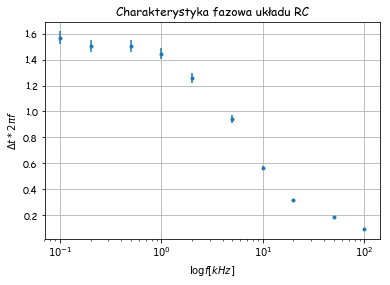

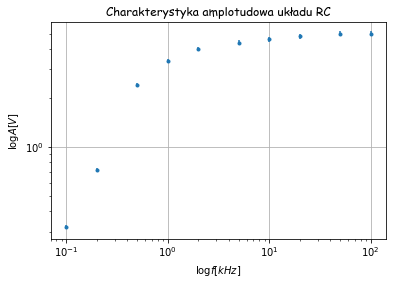

In [46]:
dane = pd.read_csv('fazowo-amplitudowa.csv')
dane['f[Hz]'] *= 1e-3 #w kHz
dane['arctg'] = dane['deltaT[ms]']*np.pi*2*dane['f[Hz]']
dane['DeltadeltaT'] =dane['deltaT[ms]']*0.03 #np.sqrt((dane['deltaT[ms]']*0.03)**2+(dane['ZakresDeltaT[ms]']/np.sqrt(3))**2)
dane['DeltaArctg'] = dane['DeltadeltaT']*np.pi*2*dane['f[Hz]']
plt.errorbar(dane['f[Hz]'],dane['arctg'],dane['DeltaArctg'],0,'.')
plt.xscale('log')
plt.xlabel(r'$\log{f[kHz]}$')
plt.grid()
plt.ylabel(r'$\Delta t*2\pi f$')
plt.title('Charakterystyka fazowa układu RC')
# plt.savefig('fazowaRC.png')
plt.show()
dane['DeltaAmplituda'] = dane['Amplituda[V]']*0.03
plt.errorbar(dane['f[Hz]'],dane['Amplituda[V]'],dane['DeltaAmplituda'],0,'.')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel(r'$\log{f[kHz]}$')
plt.ylabel(r'$\log{A[V]}$')
plt.title('Charakterystyka amplotudowa układu RC')
# plt.savefig('amplitudowaRC.png')

g = 4.407 +/- 0.190
r = 


16.393428328245403

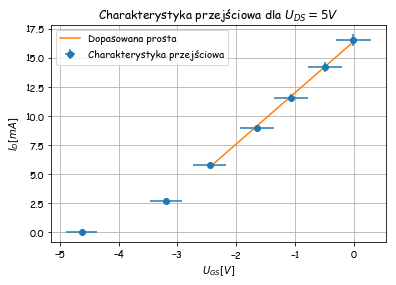

In [48]:
charakterograf = pd.read_csv('Tranzystor.csv')
charakterograf['DeltaU'] = charakterograf['U[V]']*0.008+0.3
charakterograf['DeltaI'] = charakterograf['I[mA]']*0.03
plt.errorbar(charakterograf['U[V]'],charakterograf['I[mA]'],charakterograf['DeltaI'],charakterograf['DeltaU'],'o',label='Charakterystyka przejściowa')
plt.xlabel(r'$U_{GS}[V]$')
plt.ylabel(r'$I_D[mA]$')
plt.grid()
plt.title(r'Charakterystyka przejściowa dla $U_{DS} = 5V$')
prosta, cov = np.polyfit(charakterograf['U[V]'][2:],charakterograf['I[mA]'][2:],1,cov=True)
plt.plot(charakterograf['U[V]'][2:],charakterograf['U[V]'][2:]*prosta[0]+prosta[1],label='Dopasowana prosta')
plt.legend()
plt.savefig('TranPrzejsciowa.png')
# plt.plot(0,16.52,'.') #I_dss
# plt.plot(-4.63,0,'.') #U_dsoff
print("g = {:.3f} +/- {:.3f}".format(prosta[0],np.sqrt(cov[0,0]))) #g_m w ms
print('r = ') #r_D
prosta[1]

In [52]:
5.8*0.03

0.174